In [92]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widg
import copy



<function __main__.plotData>

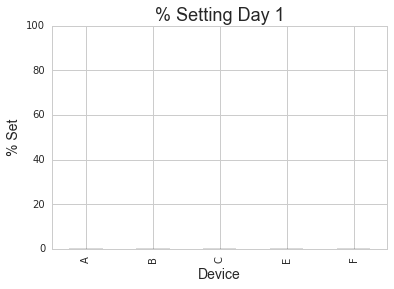

In [94]:
Truss_Level = 101
a=[0]*7

for i in range(1,8):
    Data_Set = i
    df = pd.read_csv('C:\\Users\\Reily\\Desktop\\Beeyond Data\\data_set_'+str(Data_Set)+'.csv')
    df = df.fillna(0)
    df.columns = [c.replace(' ', '_') for c in df.columns]

    #make a unrefrenced copy of our data frame
    df1 = copy.deepcopy(df)

    #reduce data by truss level
    df2 = df1.loc[(df1.Truss == Truss_Level)]

    #group data by device
    dfGroupByDevice = df2.groupby(df2.Device).sum()

    #normalize the setting flowers per device based on total flowers per device

    dfGroupByDevice.Setting = dfGroupByDevice.Setting.div(dfGroupByDevice.Total_flowers)
    dfGroupByDevice.Setting = 100*dfGroupByDevice.Setting

    #making data frame of device and percent setting
    dfGroupByDevice = dfGroupByDevice[['Setting']]
    dfGroupByDevice
    dfGroupByDevice.columns = ['% Setting Day ' + str(i)] 
    a[i-1]= dfGroupByDevice
    
bigFrame = pd.concat(a, axis=1)

def plotData(day):
    plt.xlabel('Treatment', fontsize = 14)
    plt.ylabel('% Set', fontsize = 14)
    plt.title('% Setting Day ' + str(int (day)),fontsize = 18)
    plt.grid(False)
    plt.ylim([0,100])
    bigFrame['% Setting Day ' + str(int (day))].plot(kind='bar',)

timeSlider = widg.FloatSlider(description='Time', min=1, max=7, step=1)

widg.interact(plotData,
            day=timeSlider)

In [ ]:
#make a unrefrenced copy of our data frame
df1 = copy.deepcopy(df)

In [41]:
#reduce data by truss level
df2 = df1.loc[(df1.Truss == Truss_Level)]
#df2

In [42]:
#group data by device
dfGroupByDevice = df2.groupby(df2.Device).sum()
dfGroupByDevice

,Plant,Truss,Total_flowers,Budding,Transition_B_to_O,Open,Closed,Setting,Difference
Device,,,,,,,,,
A,105,1414,197,105,26,43,15,8,0
B,105,1414,187,89,32,54,5,7,0
C,105,1414,215,115,37,36,21,6,0
E,45,909,114,79,19,15,1,0,0
F,58,1010,185,104,38,22,15,6,0


In [43]:
#normalize the setting flowers per device based on total flowers per device

dfGroupByDevice.Setting = dfGroupByDevice.Setting.div(dfGroupByDevice.Total_flowers)
dfGroupByDevice.Setting = 100*dfGroupByDevice.Setting

#making data frame of device and percent setting
dfGroupByDevice = dfGroupByDevice[['Setting']]
dfGroupByDevice

,Setting
Device,
A,4.060914
B,3.743316
C,2.790698
E,0.000000
F,3.243243


In [ ]:
#notes: 
#need to figure out how to sum the devices then normalize that data
#display more than one graph then iterate them in time